# House Price Forecast per zipcode using NeuralProphet
### A Time-Series Modeling Library based on Neural-Networks

![nprophet](https://user-images.githubusercontent.com/67468718/121110043-80e46780-c7c1-11eb-8aa4-9b9330156d09.JPG)


## 1. Introduction: NeuralProphet vs. Prophet

**NeuralProphet** is a python library for modeling time-series data based on neural networks. It’s built on top of **PyTorch** and is heavily inspired by **Facebook Prophet** and **AR-Net** libraries.

From the library name, you may ask what is the main difference between Facebook’s Prophet library and NeuralProphet. According to NeuralProphet’s [documentation](http://neuralprophet.com/changes-from-prophet/), the added features are:
 * Using PyTorch’s Gradient Descent optimization engine making the modeling process much faster than Prophet
 * Using AR-Net for modeling time-series autocorrelation (aka serial correlation)
 * Custom losses and metrics
 * Having configurable non-linear layers of feed-forward neural networks,
 * etc.


## 2. Install

For free error **NeuralProphet** installation, please create a fresh conda enviroment before proceeding with **NeuralProphet** installation and review all packages versions to make sure they're matching **NeuralProphet** Requirements to avoid any conflicts.

There is no pip or conda package for this library at this time. You can install it by cloning the repository and installing it running pip install .However, if you are going to use the package in a Jupyter Notebook environment, you should install their live version pip install .[live]. This will provide more features such as a live plot of train and validation loss using plot_live_loss().

In [ ]:
git clone https://github.com/ourownstory/neural_prophet 
cd neural_prophet 
pip install .[live]

## 3. Import relevant libraries

In [1]:
# Install the necessary libraries:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from neuralprophet import NeuralProphet
import os
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
savefig_options = dict(format="png", bbox_inches="tight")
plt.style.use('ggplot')
%matplotlib inline
import pickle

In [75]:
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot
init_notebook_mode(connected=True)

## 4. Load and view the data

**Data Source:**

**[Redfin](https://www.redfin.com/)** is a real estate brokerage, meaning they have direct access to data from local multiple listing services, as well as insight from their real estate agents across the country. That’s why they’re able to offer the most reliable data on the state of the housing market. They publish existing industry data faster, and offer additional data on tours and offers that no one else has. Using the tools **[here](https://www.redfin.com/news/data-center/)**, everyone can visualize and download housing market data for metropolitan areas, cities, neighborhoods and zip codes across the nation.

**Focus Area**

We're only interested in specific area in North California representing 31 Zipcodes as shown below: 

|||||||
|:--:|:--:|:--:|:--:|:--:|:--:|
|94506|	94541|	94568|	94521|	94551|	94588|
|94507	|94544|	94577|	94523|	94553|	94595|
|94509	|94545	|94578|	94526|	94565|	94597|
|94518	|94546	|94582|	94531|	94566|	94598|
|94519	|94550|	94583|	94801|	94804|	95050|
|95051					



In [2]:
# Check Current Directory:
os.getcwd()

'C:\\Users\\aktha\\Desktop\\Future\\GOALLLLL\\capstone_two_House_Prices\\Modeling'

In [ ]:
# Changing the directory:
os.chdir(r"path/Feature_Engineering/datasets")

In [ ]:
#Confirm the directory:
os.getcwd()

In [3]:
# List files/folders in the cd:
os.listdir()

['.ipynb_checkpoints',
 '0100_simple_forecast (1).ipynb',
 'app.ipynb',
 'app.py',
 'awesome.py',
 'awesome_1.py',
 'base_dt.png',
 'deploy_df.csv',
 'Distance_between_Houses_school_rating_using_haversine.ipynb',
 'Electric_Production.csv',
 'final_app.py',
 'final_df.csv',
 'forecast_example.JPG',
 'forecast_model.pkl',
 'forecast_model_v1.pkl',
 'globe.JPG',
 'GreatSchools_NCA_df_app.csv',
 'GreatSchools_NCA_df_app_v1.csv',
 'GreatSchools_NCA_df_app_v2.csv',
 'greykite.JPG',
 'greykite_forecast.JPG',
 'haversine.JPG',
 'hope_app.py',
 'house.JPG',
 'house_2.JPG',
 'house_3.JPG',
 'house_4.JPG',
 'house_5.JPG',
 'house_6.JPG',
 'house_7.JPG',
 'house_8.JPG',
 'house_light_1.JPG',
 'House_Price_Forecast_per_ZipCode_using_Greykite-Copy1.ipynb',
 'House_Price_Forecast_per_ZipCode_using_Greykite-Copy2.ipynb',
 'House_Price_Forecast_per_ZipCode_using_Greykite.ipynb',
 'House_Price_Forecast_per_zipcode_using_NeuralProphet.ipynb',
 'last_app.py',
 'latest_app.py',
 'light_house.JPG',
 'light

### 4.1 Load the data 

In [4]:
df = pd.read_csv('redfine_houses_sales_2012_2021.csv', infer_datetime_format=True)

In [5]:
# Let's look at the top 5 rows of the data:
df.head()

,zipcode,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,...,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04
0,94506,843000,825000,832000,867000,880000,895000,881000,866000,840000,...,1478000,1497000,1490000,1525000,1550000,1610000,1615000,1651000,1835000,1851000
1,94507,1235000,1055000,1170000,1140000,1225000,1175000,1249000,1215000,1225000,...,1850000,1800000,1840000,2010000,1901000,1960000,1935000,2100000,2298000,2338000
2,94509,149000,148000,150000,155000,160000,172000,181000,185000,199000,...,437000,445000,460000,460000,470000,465000,475000,485000,501000,488000
3,94510,270000,281000,285000,290000,303000,313000,326000,335000,338000,...,593000,650000,670000,675000,680000,668000,685000,665000,715000,728000
4,94513,290000,295000,300000,305000,314000,328000,344000,340000,335000,...,635000,660000,675000,686000,678000,688000,696000,716000,755000,778000


In [6]:
#Now, let's reshape df dataframe for better visibility using .melt(): df
df = pd.melt(df, id_vars=['zipcode'], value_vars=df.columns[1:])

In [7]:
df.head()

,zipcode,variable,value
0,94506,2012-02,843000
1,94507,2012-02,1235000
2,94509,2012-02,149000
3,94510,2012-02,270000
4,94513,2012-02,290000


In [8]:
#let's reorder columns:
df = df [['variable', 'value', 'zipcode']]
df.head()

,variable,value,zipcode
0,2012-02,843000,94506
1,2012-02,1235000,94507
2,2012-02,149000,94509
3,2012-02,270000,94510
4,2012-02,290000,94513


In [9]:
df.tail()

,variable,value,zipcode
7765,2021-04,560000,94804
7766,2021-04,783000,94805
7767,2021-04,585000,94806
7768,2021-04,1315000,95050
7769,2021-04,1510000,95051


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7770 entries, 0 to 7769
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   variable  7770 non-null   object
 1   value     7770 non-null   int64 
 2   zipcode   7770 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 182.2+ KB


In [11]:
# Let's look at the shape of the data:
shape = df.shape
print(f'Our data has {shape[0]} Rows and {shape[1]} Columns!.')

Our data has 7770 Rows and 3 Columns!.


### 4.2 Missing Data

In [12]:
#First let's have a general view of tracks df:
ratings_missing = pd.concat([df.nunique(), df.dtypes, df.isnull().sum(), 100*df.isnull().mean()], axis=1)
ratings_missing.columns = [['unique_count', 'data_type', 'missing_count', 'missing%']]
ratings_missing

,unique_count,data_type,missing_count,missing%
variable,111,object,0,0.0
value,1261,int64,0,0.0
zipcode,70,int64,0,0.0


**Awesome, There's no missing values any more.**

### 4.3 Data Types - Time Column

In [13]:
# Now let's check time column "variable" data type:
df.variable.dtypes

dtype('O')

In [14]:
df['variable'] = df['variable'].astype('datetime64[ns]')


In [15]:
df['value'] = df['value'].astype('float64')

In [16]:
df['zipcode'] = df['zipcode'].astype('float64')

In [17]:
df.dtypes

variable    datetime64[ns]
value              float64
zipcode            float64
dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7770 entries, 0 to 7769
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   variable  7770 non-null   datetime64[ns]
 1   value     7770 non-null   float64       
 2   zipcode   7770 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 182.2 KB


Alright, now, let's rename the following coulmns: **'variable' to 'year_month' and 'value' to 'median_sale_price'!.

In [19]:
# Let's rename the following columns:  'month_date_yyyymm' to 'year_month', 'postal_code' to 'zipcode' and 'zip_name' to 'city':
df.rename(columns = {list(df)[0]: 'year_month', list(df)[1]: 'median_sale_price'}, inplace = True)
df.head()

,year_month,median_sale_price,zipcode
0,2012-02-01,843000.0,94506.0
1,2012-02-01,1235000.0,94507.0
2,2012-02-01,149000.0,94509.0
3,2012-02-01,270000.0,94510.0
4,2012-02-01,290000.0,94513.0


### 4.4 Exploratory Data Analysis (EDA)

#### 4.4.1 NCAL TOP Zipcodes by Avg listing Price 2016-2021

In [20]:
df_zip = df.groupby('zipcode')['median_sale_price']
df_zip = df_zip.mean()
df_zip = df_zip.sort_values(ascending=True).head(70)


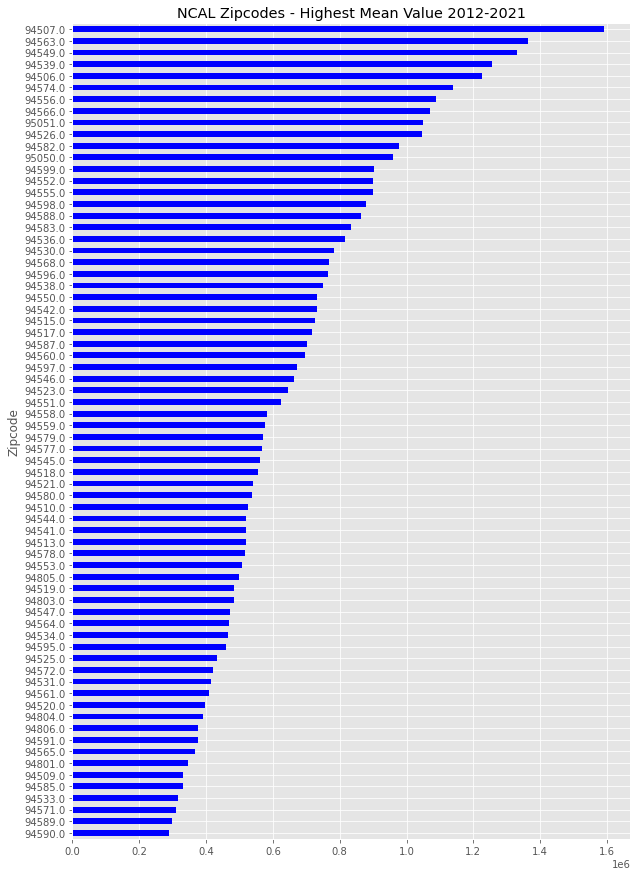

In [21]:
df_zip.plot.barh(color='blue', figsize=(10,15))
plt.title('NCAL Zipcodes - Highest Mean Value 2012-2021')
plt.ylabel('Zipcode')
plt.show()

#### 4.4.2 Median Listing Price For top 10 and lower 10 Zipcodes 2012-2021

In [22]:
top_zpcodes = [94507, 94563, 94549, 94539, 94506, 94574, 94556, 94566, 945051, 94526]
low_zpcodes = [94806, 94591, 94565, 94801, 94509, 94585, 94533, 94571, 94589, 94590]

In [23]:
top = df[df['zipcode'].isin(top_zpcodes)]
low = df[df['zipcode'].isin(low_zpcodes)]

In [79]:
fig = px.line(top, x="year_month", y="median_sale_price", color='zipcode', title='Top NCAL Zipcodes House Sale Price: 2012-2021')
iplot(fig)

In [78]:
fig = px.line(low, x="year_month", y="median_sale_price", color='zipcode', title='Low NCAL Zipcodes House Sale Price: 2012-2021')
iplot(fig)

## 5. Neural Prophet Input Data

The input data format expected by the **neural_prophet package** is the same as in original **prophet**. It should have two columns, **ds** which has the timestamps and **y** column which contains the observed values of the time series. , so let's pick one **zipcode=94568**.

In [26]:
df.head()

,year_month,median_sale_price,zipcode
0,2012-02-01,843000.0,94506.0
1,2012-02-01,1235000.0,94507.0
2,2012-02-01,149000.0,94509.0
3,2012-02-01,270000.0,94510.0
4,2012-02-01,290000.0,94513.0


In [27]:
# Let's rename the following columns for Greykite:
df.rename(columns = {list(df)[0]: 'ds', list(df)[1]: 'y', list(df)[2]: 'zipcode'}, inplace = True)
df.head()

,ds,y,zipcode
0,2012-02-01,843000.0,94506.0
1,2012-02-01,1235000.0,94507.0
2,2012-02-01,149000.0,94509.0
3,2012-02-01,270000.0,94510.0
4,2012-02-01,290000.0,94513.0


In [28]:
# Now, let's filter in specif zipcode and reset index so the index will start from zero for the min value:
zip_filter = df[df['zipcode']==94568]
zip_filter.drop('zipcode', axis=1, inplace=True)
zip_filter.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\aktha\anaconda3\envs\nprophet\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




,ds,y
42,2012-02-01,390000.0
112,2012-03-01,400000.0
182,2012-04-01,410000.0
252,2012-05-01,438000.0
322,2012-06-01,470000.0


In [29]:
zip_filter.head()

,ds,y
42,2012-02-01,390000.0
112,2012-03-01,400000.0
182,2012-04-01,410000.0
252,2012-05-01,438000.0
322,2012-06-01,470000.0


In [30]:
df['ds'][df. index[-1]]

Timestamp('2021-04-01 00:00:00')

## 6. Simple Model

A simple model with neural_prophet for this dataset can be fitted by creating an object of the NeuralProphet class as follows and calling the fit function. This fits a model with the default settings in the model. For more details on these default settings, refer to the Section on Hyperparameter Selction.

### 6.1 Fitting the Model

In [31]:
model = NeuralProphet()
metrics = model.fit(zip_filter, freq="MS")#"MS" for Monthly at start date, "H" for hourly, "D" for daily, "W" for weekly, etc. 
                    #plot_live_loss=True, 
                    #validate_each_epoch=True) 
metrics.head(3)

INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 362


  0%|          | 0/204 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.85E-01, min: 6.00E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 4.05E-01
Epoch[362/362]: 100%|███████████████████████████████████| 362/362 [00:04<00:00, 73.49it/s, SmoothL1Loss=0.000967, MAE=1.81e+4, MSE=6.69e+8, RegLoss=0]


,SmoothL1Loss,MAE,MSE,RegLoss
0,0.642269,623394.477759,5.521147e+11,0.0
1,0.605127,600339.052365,5.128436e+11,0.0
2,0.571780,579461.241554,4.771714e+11,0.0


Once the model is fitted, we can make forecasts using the fitted model. For this, we first need to create a future dataframe consisting of the time steps into the future that we need to forecast for. NeuralProphet provides the helper function make_future_dataframe for this purpose. Note that the the frequency of data is set globally here.

In [32]:
future = model.make_future_dataframe(zip_filter, periods=14, n_historic_predictions=len(df)) # 28 referes 28 Months
future.tail(3)

WARNING - (NP.forecaster.make_future_dataframe) - Insufficient data for 7770 historic forecasts, reduced to 111.


,ds,y,t,y_scaled
122,2022-04-01,NaN,1.109053,NaN
123,2022-05-01,NaN,1.118016,NaN
124,2022-06-01,NaN,1.127278,NaN


Note: 'y' and 'y_scaled' are not given for the period extending into the future, as we do not know their true values.

In [33]:
forecast = model.predict(future)
forecast.tail(20).round()
#print(list(forecast.columns))

,ds,y,yhat1,residual1,trend,season_yearly
105,2020-11-01,978000.0,974394.0,-3606.0,1003180.0,-28787.0
106,2020-12-01,1030000.0,994930.0,-35070.0,1013635.0,-18705.0
107,2021-01-01,1050000.0,1009262.0,-40738.0,1024438.0,-15176.0
108,2021-02-01,1085000.0,1026617.0,-58383.0,1035241.0,-8625.0
109,2021-03-01,1095000.0,1035134.0,-59866.0,1044999.0,-9865.0
110,2021-04-01,1125000.0,1060724.0,-64276.0,1055802.0,4921.0
111,2021-05-01,NaN,1078946.0,NaN,1066257.0,12689.0
112,2021-06-01,NaN,1102171.0,NaN,1077061.0,25110.0
113,2021-07-01,NaN,1110149.0,NaN,1087516.0,22634.0
114,2021-08-01,NaN,1120597.0,NaN,1098319.0,22278.0


The returned forecast dataframe contains the original datestamps, 'y' values, the predicted 'yhat' values, residuals and all the individual model components.

### 6.2 Plotting

With the forecasts obtained from the model, you can visualize them.

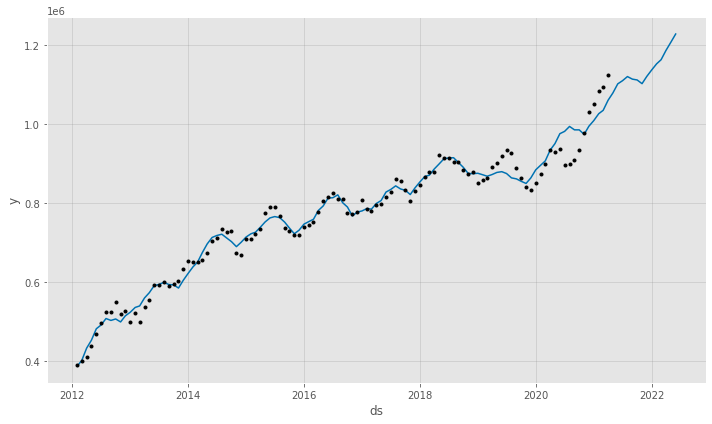

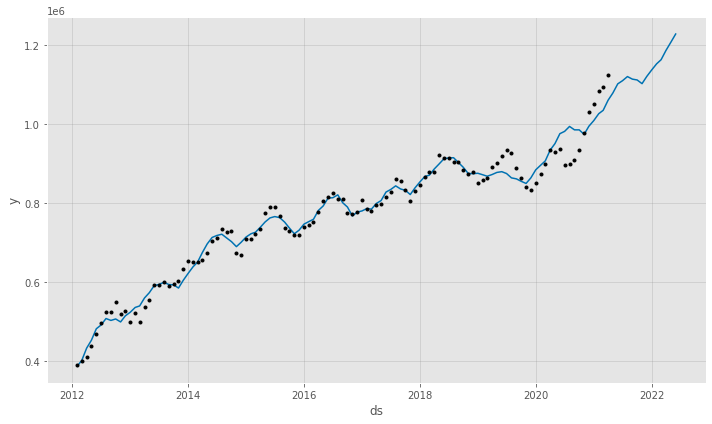

In [34]:
# plots the model predictions
model.plot(forecast)

This is a simple model with a trend, a weekly seasonality and a yearly seasonality estimated by default. You can also look at the individual components separately as below.

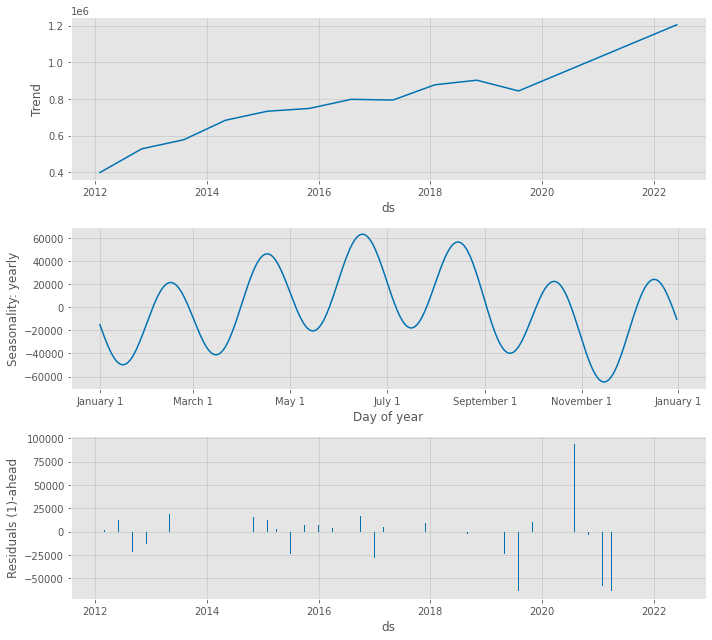

In [35]:
# plots the individual forecast components for the given time period.
fig_comp = model.plot_components(forecast, residuals=True)

The individual coefficient values can also be plotted as below to gain further insights.

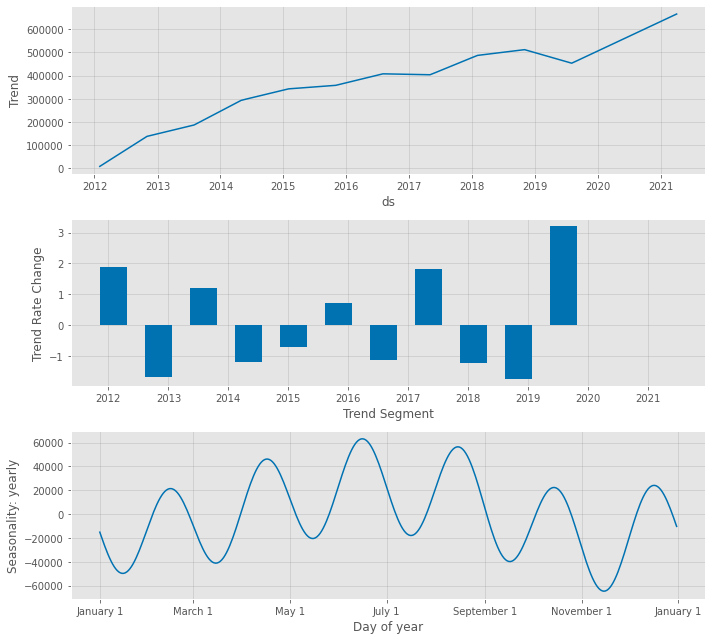

In [36]:
# visualizes the model parameters.
fig_param = model.plot_parameters()

## 7. Adjusting Trend

The default values work fairly well in this example. However, the default of 5 changepoints may not be adequate if the actual change in trend happens to fall in a region between the points.


### 7.1 Increasing Trend Flexibility

We can address this by increasing the number of changepoints, giving the trend more flexibility, at the danger of overfitting.

Let's try what happens if we increase the number of changepoints to 30. Additionally, we can increase the range of data on which we fit trend changepoints to only exlude the last 10 percent (default is 20 percent).

In [37]:
model_final = NeuralProphet(
                           n_changepoints=40,
                           changepoints_range=0.90,
                           num_hidden_layers=2,
                           #learning_rate=1.0,
                           seasonality_mode="multiplicative",
                           #n_lags=14,
                           #n_forecasts=14,
                            )

metrics = model_final.fit(zip_filter, freq='MS')



INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 362


  0%|          | 0/204 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.15E-02, min: 1.95E+00
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 6.77E-01
Epoch[362/362]: 100%|████████████████████████████████████| 362/362 [00:04<00:00, 78.31it/s, SmoothL1Loss=0.000391, MAE=1.23e+4, MSE=2.7e+8, RegLoss=0]


In [38]:
metrics.shape

(362, 4)

In [39]:
metrics

,SmoothL1Loss,MAE,MSE,RegLoss
0,2.021408,1.476254e+06,3.101968e+12,0.0
1,1.872751,1.383100e+06,2.765839e+12,0.0
2,1.734752,1.290147e+06,2.455701e+12,0.0
3,1.602275,1.212971e+06,2.138678e+12,0.0
4,1.467804,1.139137e+06,1.847943e+12,0.0
...,...,...,...,...
357,0.000391,1.231079e+04,2.701404e+08,0.0
358,0.000391,1.231017e+04,2.701082e+08,0.0
359,0.000391,1.231050e+04,2.701152e+08,0.0
360,0.000391,1.231012e+04,2.700889e+08,0.0


In [40]:
future = model_final.make_future_dataframe(zip_filter, periods=20, n_historic_predictions=len(df)) #forecast for 20 Months
forecast = model_final.predict(future)

WARNING - (NP.forecaster.make_future_dataframe) - Insufficient data for 7770 historic forecasts, reduced to 111.


In [41]:
forecast.tail(25).round()

,ds,y,yhat1,residual1,trend,season_yearly
106,2020-12-01,1030000.0,1001652.0,-28348.0,1024236.0,-0.0
107,2021-01-01,1050000.0,1033809.0,-16191.0,1042515.0,-0.0
108,2021-02-01,1085000.0,1064955.0,-20045.0,1060794.0,0.0
109,2021-03-01,1095000.0,1082760.0,-12240.0,1077304.0,0.0
110,2021-04-01,1125000.0,1119042.0,-5958.0,1095582.0,0.0
111,2021-05-01,NaN,1152153.0,NaN,1113271.0,0.0
112,2021-06-01,NaN,1172473.0,NaN,1131550.0,0.0
113,2021-07-01,NaN,1168806.0,NaN,1149239.0,0.0
114,2021-08-01,NaN,1177102.0,NaN,1167518.0,0.0
115,2021-09-01,NaN,1168013.0,NaN,1185796.0,-0.0


In [77]:
import plotly.graph_objects as go

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['y'], name='Actual Price', opacity=0.7,
                         line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x=forecast['ds'],y=forecast['yhat1'], name = 'Forecast Price',
                         line=dict(color='firebrick', width=4, dash='dash')))
fig.add_vline(x=zip_filter['ds'][zip_filter. index[-1]], line_width=3, line_dash="dot", line_color="black")
fig.add_vrect(x0="2021-05-01", x1="2022-02-01", line_width=0, fillcolor="red", opacity=0.2) #annotation_text="6M forecast", annotation_position="inside top right"
fig.add_vrect(x0="2022-03-01", x1="2022-12-01", line_width=0, fillcolor="green", opacity=0.2)#, annotation_text="12M forecast", annotation_position="inside top right"
# Edit the layout
fig.update_layout(title='House Sale Price Actual vs Forecast [Neural Prophet]',
                   xaxis_title='Time',
                   yaxis_title='House Price')
iplot(fig)

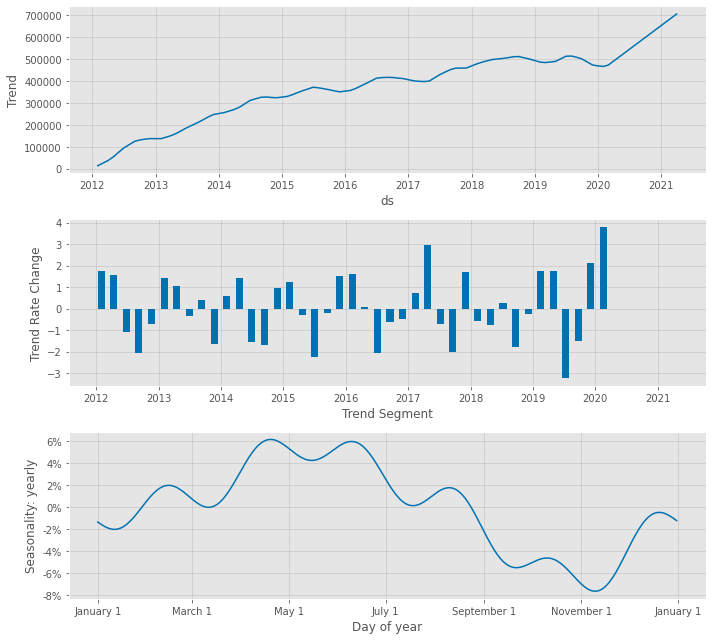

In [44]:
fig2 = model_final.plot_parameters()

### 7.2 Automatic trendpoint selection

By adding regularization, we can achieve an automatic selection of the most relevant changepoints and draw the rate changes of other points close to zero.

In [45]:
m1 = NeuralProphet(
    n_changepoints=30,
    trend_reg=1.00,
    changepoints_range=0.90,    
)
metrics = m1.fit(zip_filter, freq="MS")
future = m1.make_future_dataframe(zip_filter, periods=20, n_historic_predictions=len(df))
forecast = m1.predict(future)

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 362


  0%|          | 0/204 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.32E-02, min: 5.67E-02
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 5.18E-02
Epoch[362/362]: 100%|███████████████████████████████| 362/362 [00:04<00:00, 82.89it/s, SmoothL1Loss=0.00118, MAE=2.17e+4, MSE=8.14e+8, RegLoss=0.0177]
WARNING - (NP.forecaster.make_future_dataframe) - Insufficient data for 7770 historic forecasts, reduced to 111.


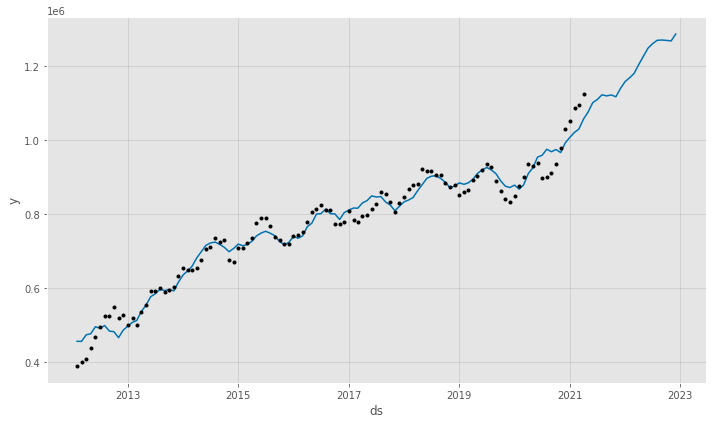

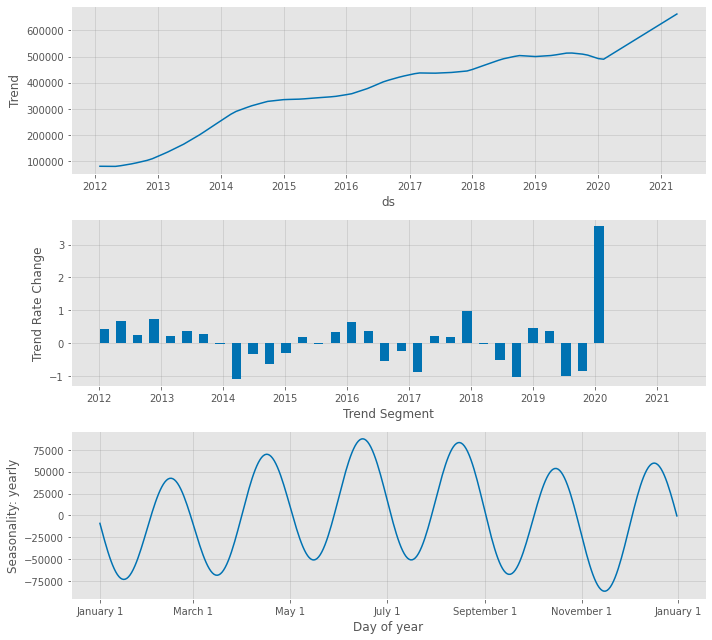

In [46]:
fig1 = m1.plot(forecast)
fig2 = m1.plot_parameters()

### 7.3 Manual Trend Changepoints

You can also manually specify the trend changepoints.

Note: A changepoint will always be added at the beginning. You can ignore it.


In [47]:
m2 = NeuralProphet(
    changepoints=['2018-03-01', '2020-03-01'], learning_rate=0.3,
)
metrics = m2.fit(zip_filter, freq="MS")
future = m2.make_future_dataframe(zip_filter, periods=28,  n_historic_predictions=len(df))
forecast = m2.predict(future)

INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 362
Epoch[362/362]: 100%|████████████████████████████████████| 362/362 [00:04<00:00, 82.58it/s, SmoothL1Loss=0.00167, MAE=2.67e+4, MSE=1.15e+9, RegLoss=0]
WARNING - (NP.forecaster.make_future_dataframe) - Insufficient data for 7770 historic forecasts, reduced to 111.


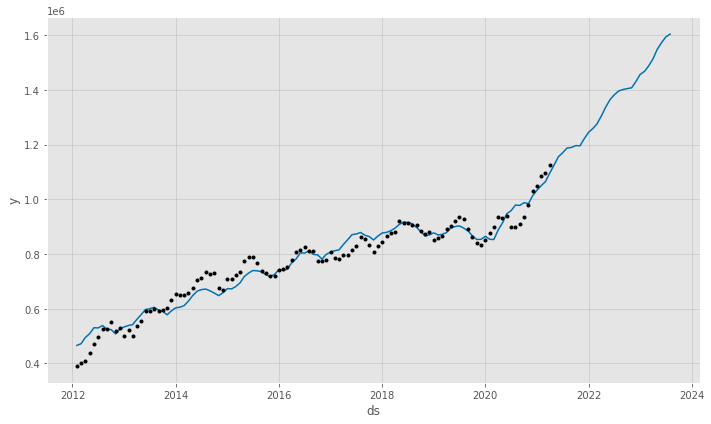

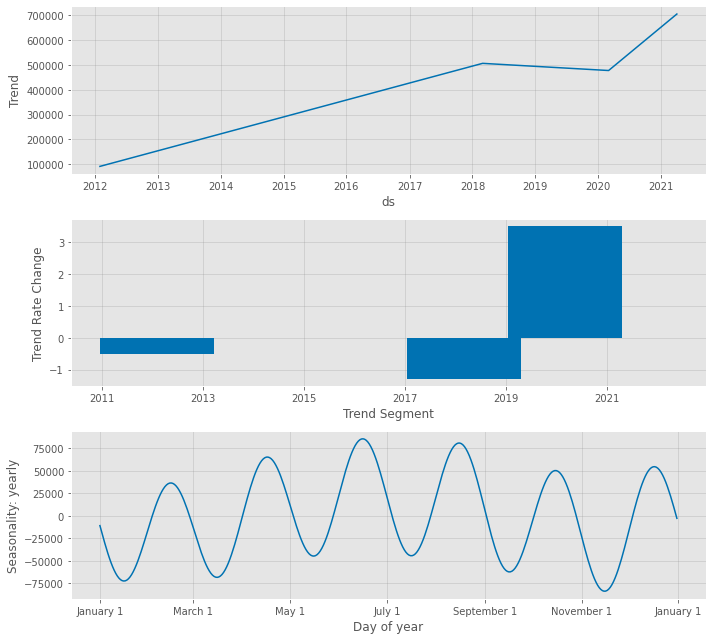

In [48]:
fig1 = m2.plot(forecast)
fig2 = m2.plot_parameters()

### 7.4 Fine-tuning Trend Flexibility

We can adjust the regularization strength to get more or less points with a non-zero rate change.

Note: for too high regularization strengths, the model fitting process becomes unstable.

In [49]:
m3 = NeuralProphet(
    n_changepoints=30,
    trend_reg=3.00,
    changepoints_range=0.90,   
)
metrics = m3.fit(zip_filter, freq="MS")
future = m3.make_future_dataframe(zip_filter, periods=28, n_historic_predictions=len(df))
forecast = m3.predict(future)

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 362


  0%|          | 0/204 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.80E-02, min: 6.57E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 3.09E-01
Epoch[362/362]: 100%|██████████████████████████████| 362/362 [00:04<00:00, 82.97it/s, SmoothL1Loss=0.000917, MAE=1.91e+4, MSE=6.34e+8, RegLoss=0.0386]
WARNING - (NP.forecaster.make_future_dataframe) - Insufficient data for 7770 historic forecasts, reduced to 111.


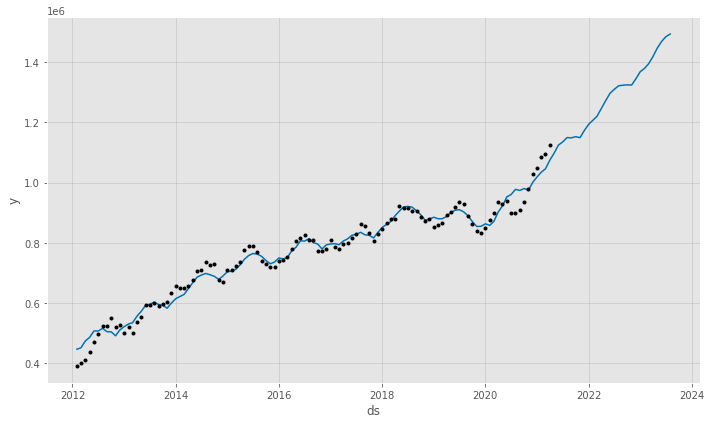

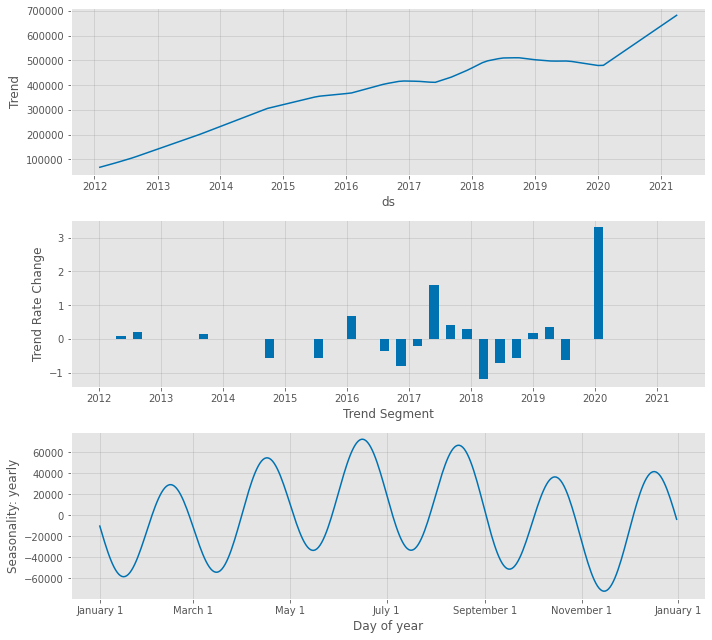

In [50]:
fig1 = m3.plot(forecast)
fig2 = m3.plot_parameters()

## 8. Autoregression

n_lags defines whether the AR-Net is enabled (if n_lags > 0) or not. The value for n_lags is usually recommended to be greater than n_forecasts, if possible since it is preferable for the FFNNs to encounter at least n_forecasts length of the past in order to predict n_forecasts into the future. Thus, n_lags determine how far into the past the auto-regressive dependencies should be considered. This could be a value chosen based on either domain expertise or an empirical analysis.


In [51]:
m4 = NeuralProphet(
    n_lags=28,
    changepoints_range=0.95,
    n_changepoints=30,
    weekly_seasonality=False,
    batch_size=64,
    epochs=10,
    learning_rate=1.0,
)
metrics = m4.fit(zip_filter, freq='MS')

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
Epoch[10/10]: 100%|████████████████████████████████████████| 10/10 [00:00<00:00, 140.87it/s, SmoothL1Loss=0.636, MAE=6.39e+5, MSE=5.28e+11, RegLoss=0]


Please note that a model with an autoregressive component can be harder to fit. The automatic selection of hyperparameters may not lead to ideal results. For best results, consider changing these manually (in order of importance):

 * learning_rate
 * epochs
 * batch_size
 
The automatically set hyperparameters (printed out as 'INFO' level logs) can serve as a good starting point.

WARNING - (NP.forecaster.make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 1.


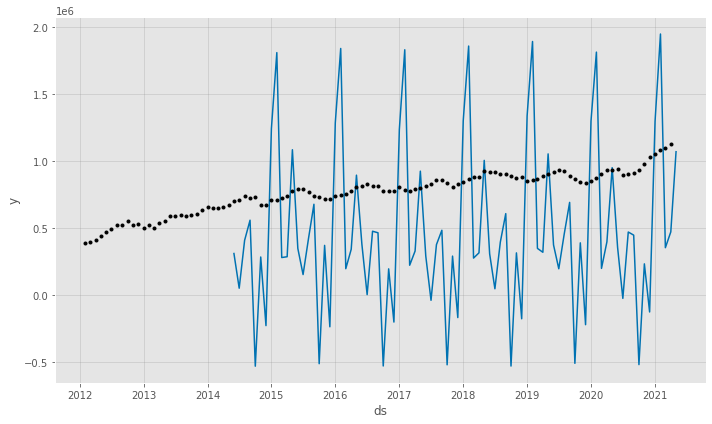

In [52]:
future = m4.make_future_dataframe(zip_filter, periods=28, n_historic_predictions=True)
forecast = m4.predict(future)
fig = m4.plot(forecast)

The predictions are now very precise, but this is not a big surprise, as we are just forecasting the very next 5 minutes.

When plotting the model parameters, the panel 'AR weight' displays the weight given to the 12 last observed values, these can be interpreted as our 'AR coefficients':

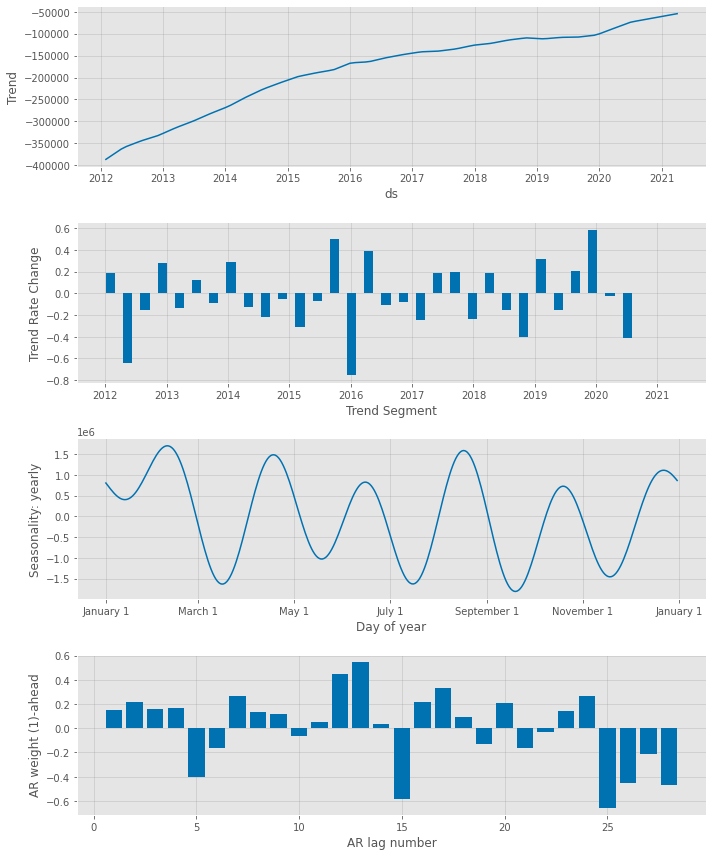

In [53]:
# fig_comp = m.plot_components(forecast)
m4 = m4.highlight_nth_step_ahead_of_each_forecast(1) # temporary workaround to plot actual AR weights
fig_param = m4.plot_parameters()

The 'AR weight' plot shows that the most recent observations are given significantly more weight compared to more distant observations.

### 8.1 Multi-step forecast

To predict multiple steps into the future, we could 'unroll' our single-step model, by predicting a step ahead, adding the forecasted value to our data, and then forecasting the next step until we reach the horizon we are interested in. However, there is a better way to do this: We can directly forecast multiple steps ahead with NeuralProphet.

We can set n_forecasts to the desired number of steps we would like to forecast (also known as 'forecast horizon'). NeuralProphet will forecast n_forecasts steps into the future, at every single step. Thus, we have n_forecasts overlapping predictions of vaying age at every historic point.

When icreasing the forecast horizon n_forecasts, we should also increase the number of past observations n_lags to at least the same value.

Here, we forecast the next 3 hours based on the last observed 6 hours, in 5-minute steps:

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
Epoch[10/10]: 100%|████████████████████████████████████████| 10/10 [00:00<00:00, 169.53it/s, SmoothL1Loss=0.327, MAE=4.15e+5, MSE=2.37e+11, RegLoss=0]
WARNING - (NP.forecaster.make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 40.


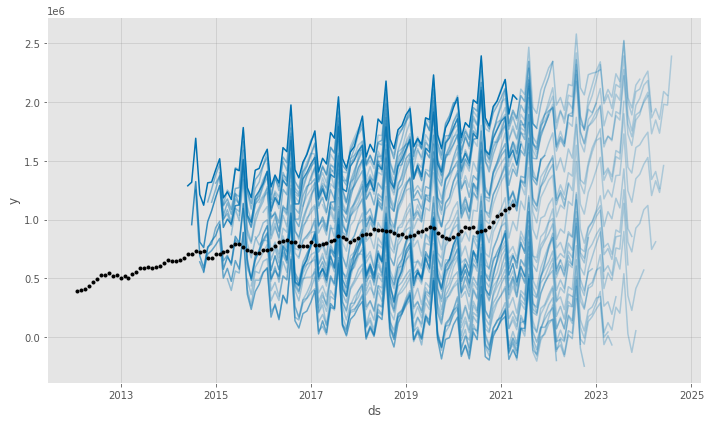

In [54]:
m5 = NeuralProphet(
    n_lags=28,
    n_forecasts=40,
    changepoints_range=0.95,
    n_changepoints=30,
    weekly_seasonality=False,
    batch_size=64,
    epochs=10,    
    learning_rate=0.3,
)
metrics = m5.fit(zip_filter, freq='MS')
future = m5.make_future_dataframe(zip_filter, periods=28, n_historic_predictions=True)
forecast = m5.predict(future)
fig = m5.plot(forecast)

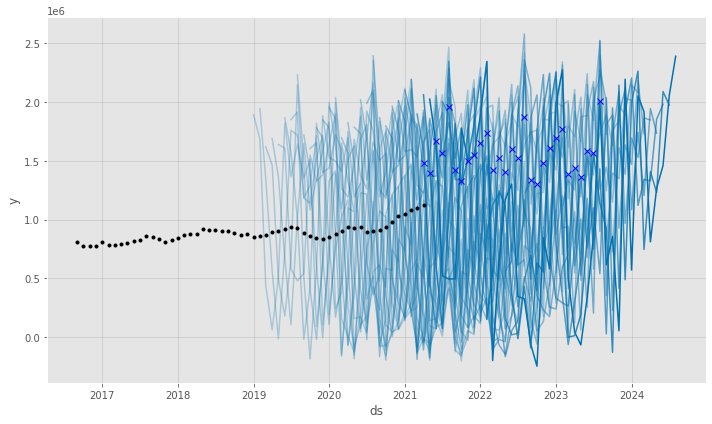

In [55]:
m5 = m5.highlight_nth_step_ahead_of_each_forecast(28)
fig = m5.plot_last_forecast(forecast, include_previous_forecasts=28)

### 8.2 Validation

Model validation for NeuralProphet can be done in two ways. Users can split the dataset manually to validate after the model fitting like below by specifying the fraction of data to be used for validation in the argument valida_p. This validation set is reserved from the end of the series.

In [56]:
model = NeuralProphet(
    n_changepoints=40,
    changepoints_range=0.90,
    num_hidden_layers=2,
    learning_rate=1.0,
)
df_train, df_val = model.split_df(zip_filter, valid_p=0.2, freq='MS')

In [57]:
train_metrics = model.fit(df_train, freq='MS')
val_metrics = model.test(df_val)

INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 400
Epoch[400/400]: 100%|███████████████████████████████████| 400/400 [00:04<00:00, 88.89it/s, SmoothL1Loss=0.000174, MAE=7.75e+3, MSE=9.24e+7, RegLoss=0]
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss       MAE            MSE
1         0.018 65439.109 9477938176.000


In [58]:
train_metrics.tail(5).round()

,SmoothL1Loss,MAE,MSE,RegLoss
395,0.0,7749.0,92447654.0,0.0
396,0.0,7748.0,92427966.0,0.0
397,0.0,7747.0,92413841.0,0.0
398,0.0,7747.0,92408852.0,0.0
399,0.0,7747.0,92403089.0,0.0


In [59]:
val_metrics.round()

,SmoothL1Loss,MAE,MSE
0,0.0,65439.0,9.477938e+09


## 9. Model Selection

In [60]:
# for reproducibility let's make sure we set below:
from neuralprophet import set_random_seed 
set_random_seed(0)

In [61]:
model_final = NeuralProphet(
                           n_changepoints=30,
                           changepoints_range=0.90,
                           num_hidden_layers=2,
                           #learning_rate=0.5,
                           seasonality_mode="multiplicative",
                           #n_lags=30,
                           #n_forecasts=30,
                            )

metrics = model_final.fit(zip_filter, validate_each_epoch=True, valid_p=0.2, freq='MS')

INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 400


  0%|          | 0/199 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.92E-01, min: 4.98E-02
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 8.97E-02
Epoch[400/400]: 100%|█| 400/400 [00:05<00:00, 76.34it/s, SmoothL1Loss=0.000281, MAE=9.55e+3, MSE=1.49e+8, RegLoss=0, MAE_val=6.72e+4, MSE_val=1.07e+10


In [62]:
metrics

,SmoothL1Loss,MAE,MSE,RegLoss,SmoothL1Loss_val,MAE_val,MSE_val
0,0.229591,339059.168188,1.217972e+11,0.0,0.327809,397539.593750,1.757279e+11
1,0.222095,332997.415379,1.178232e+11,0.0,0.317392,388590.906250,1.701460e+11
2,0.214832,327072.538272,1.139723e+11,0.0,0.306995,379284.000000,1.645724e+11
3,0.207064,320430.483146,1.098542e+11,0.0,0.296503,369605.875000,1.589538e+11
4,0.199642,314045.801966,1.059208e+11,0.0,0.285624,361286.125000,1.531317e+11
...,...,...,...,...,...,...,...
395,0.000281,9546.947299,1.492659e+08,0.0,0.020213,67193.929688,1.072173e+10
396,0.000281,9546.860972,1.492661e+08,0.0,0.020213,67193.343750,1.072174e+10
397,0.000281,9546.606742,1.492580e+08,0.0,0.020212,67193.070312,1.072153e+10
398,0.000281,9546.453685,1.492536e+08,0.0,0.020212,67192.742188,1.072143e+10


Text(0.5, 1.0, 'Model Loss (MAE)')

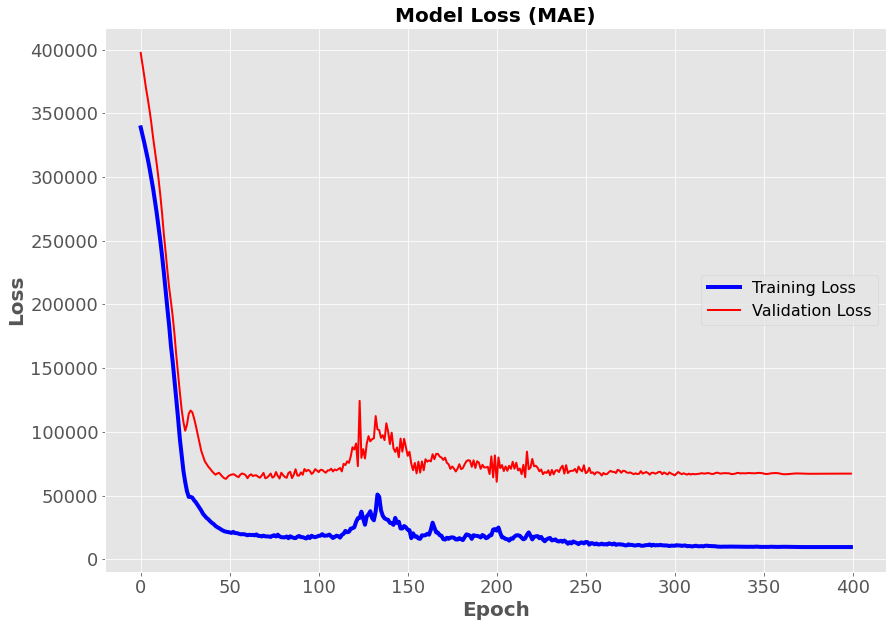

In [69]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(metrics["MAE"], '-b', linewidth=4, label="Training Loss")  
ax.plot(metrics["MAE_val"], '-r', linewidth=2, label="Validation Loss")

# You can use metrics["SmoothL1Loss"] and metrics["SmoothL1Loss_val"] too.

ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_xlabel("Epoch", fontsize=20, fontweight="bold")
ax.set_ylabel("Loss", fontsize=20, fontweight="bold")

ax.set_title("Model Loss (MAE)", fontsize=20, fontweight="bold")

In [70]:
model_final = NeuralProphet(
                           n_changepoints=30,
                           changepoints_range=0.90,
                           num_hidden_layers=2,
                           #learning_rate=0.5,
                           seasonality_mode="multiplicative",
                           #n_lags=30,
                           #n_forecasts=30,
                            )

metrics = model_final.fit(zip_filter, freq='MS')

INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 362


  0%|          | 0/204 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.85E-01, min: 8.93E-02
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 1.14E-01
Epoch[362/362]: 100%|███████████████████████████████████| 362/362 [00:04<00:00, 72.91it/s, SmoothL1Loss=0.000546, MAE=1.53e+4, MSE=3.78e+8, RegLoss=0]


In [71]:
future = model_final.make_future_dataframe(zip_filter, periods=20, n_historic_predictions=len(df)) #forecast for 24 Months
forecast = model_final.predict(future)

WARNING - (NP.forecaster.make_future_dataframe) - Insufficient data for 7770 historic forecasts, reduced to 111.


In [76]:
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['y'], name='Actual Price', opacity=0.7,
                         line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x=forecast['ds'],y=forecast['yhat1'], name = 'Forecast Price',
                         line=dict(color='firebrick', width=4, dash='dash')))
fig.add_vline(x=zip_filter['ds'][zip_filter. index[-1]], line_width=3, line_dash="dot", line_color="black")
fig.add_vrect(x0="2021-05-01", x1="2022-02-01", line_width=0, fillcolor="red", opacity=0.2) #annotation_text="6M forecast", annotation_position="inside top right"
fig.add_vrect(x0="2022-03-01", x1="2022-12-01", line_width=0, fillcolor="green", opacity=0.2)#, annotation_text="12M forecast", annotation_position="inside top right"
# Edit the layout
fig.update_layout(title='House Sale Price Actual vs Forecast [Neural Prophet]',
                   xaxis_title='Time',
                   yaxis_title='House Price')
iplot(fig)

## 10. Save the Model

In [ ]:
pickle_out = open("forecast_model_v1.pkl", "wb")
pickle.dump(model_final, pickle_out)
pickle_out.close() 

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))